In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("marketing_campaign.csv", sep="\t")

# Usuwamy kolumny, których nie potrzebujemy do analizy
del df['Z_CostContact'], df['Z_Revenue'], df["ID"]

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [2]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


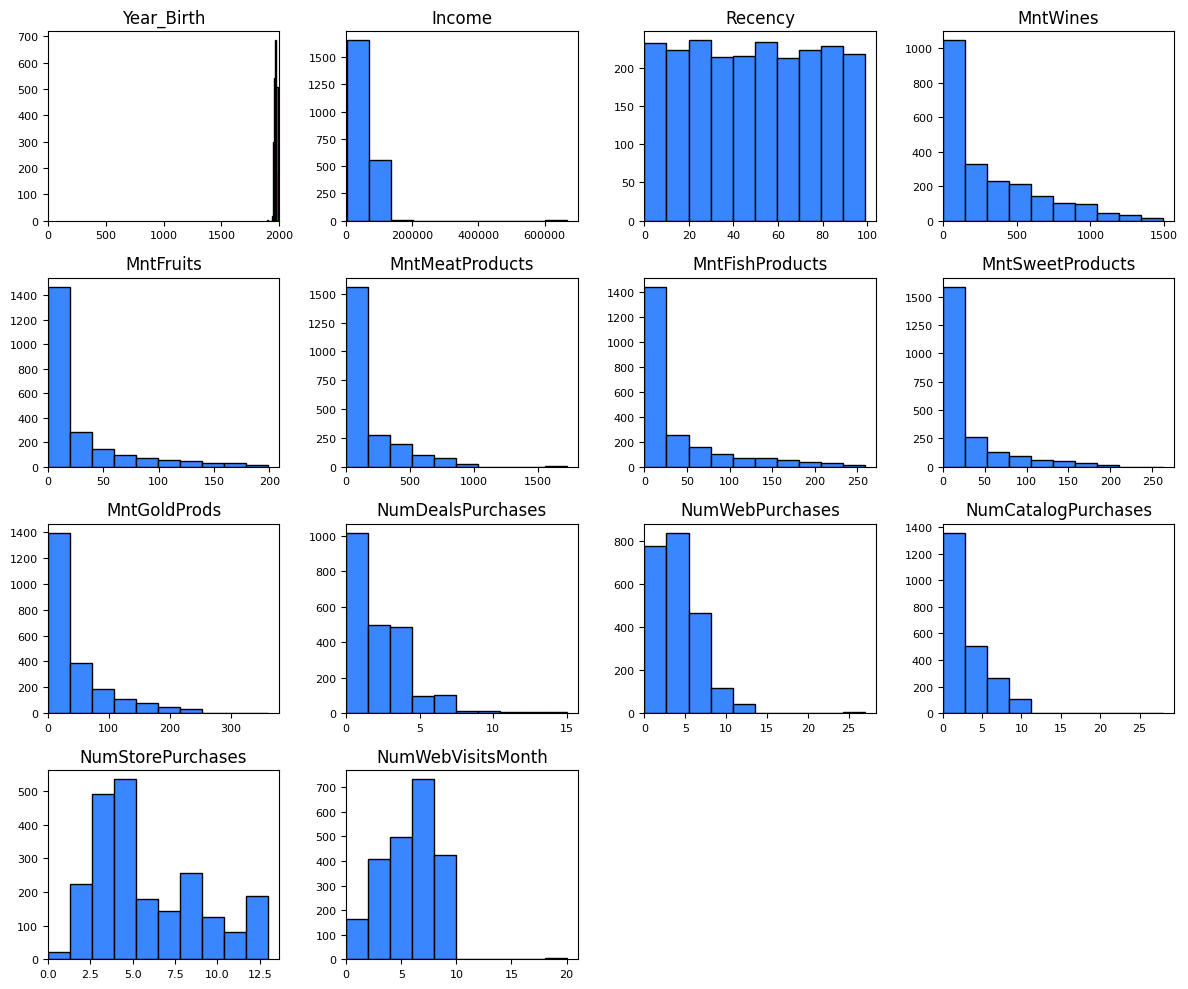

In [3]:
# Dodajemy kolorki
color_pallette = ["#3a86ff", "#ff006e", "#8338ec"]

# Wyświetlamy histogramy dla danych niebinarnych i niezwiązanych z liczbą dzieci
nonbin_columns = [col for col in df.columns if df[col].nunique() > 3]
axes = df[nonbin_columns].hist(figsize=(12, 10), layout=(4, 4), color=color_pallette[0], edgecolor='black', grid=False)

# Make axes more precise and avoid manual tick setting
for ax in axes.flatten():
    ax.tick_params(axis='both', labelsize=8)  # Adjust tick label size for clarity
    ax.set_xlim(left=0)  # Ensure the x-axis starts from 0

plt.tight_layout()
plt.show()

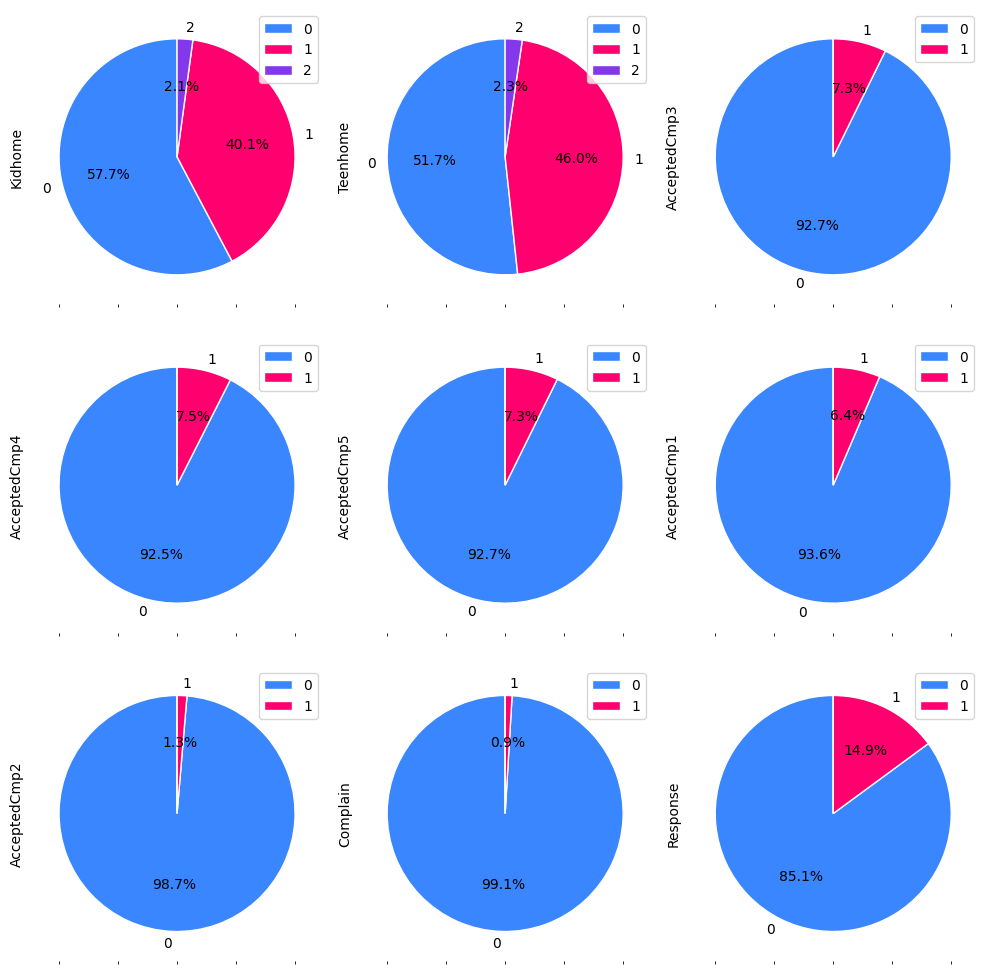

In [4]:
bin_columns = [col for col in df.columns if df[col].nunique() <= 3]

# Wyświetlamy wykresy kołowe dla danych binarnych i dotyczących liczby dzieci
ax = (
    df[bin_columns]
    .apply(lambda x: x.value_counts())
    .plot(
        kind="pie",
        subplots=True,
        figsize=(10, 10),
        layout=(3, 3),
        colors=color_pallette,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=90,
        wedgeprops={'edgecolor': 'white'},
    )
)

# Display the plot
plt.tight_layout()
plt.show()

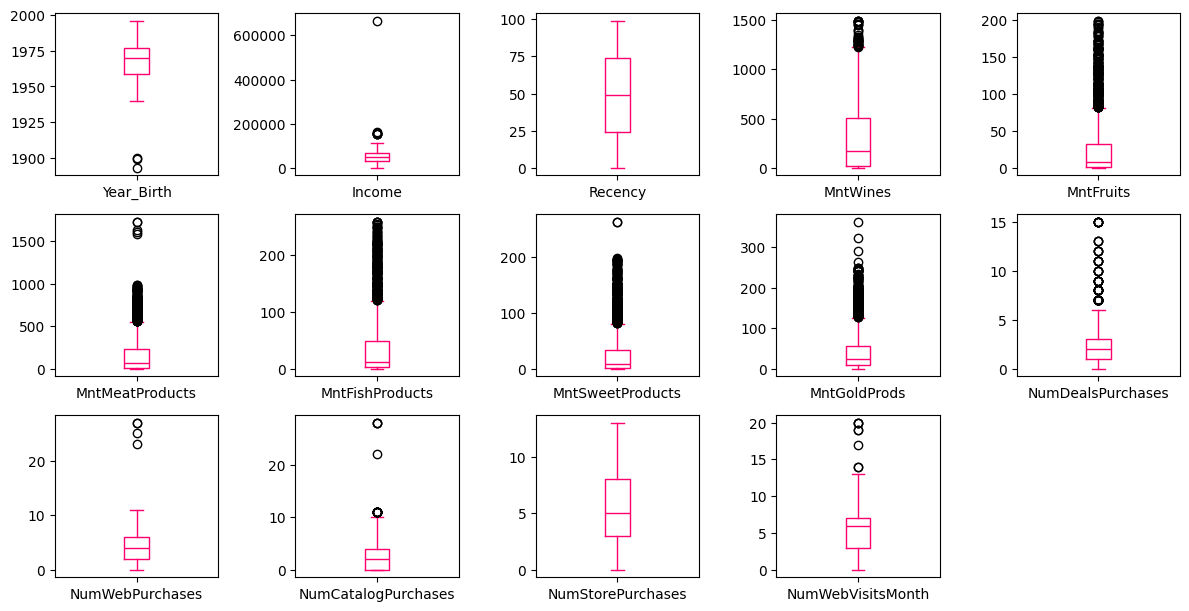

In [5]:
# Wyświetlamy histogramy dla kolumn niebinarnych
ax = (
    df[nonbin_columns]
    .plot(
        kind="box",
        subplots=True,
        figsize=(12, 10),
        layout=(5, 5),
        color=color_pallette[1],
    )
)

plt.tight_layout()
plt.show()

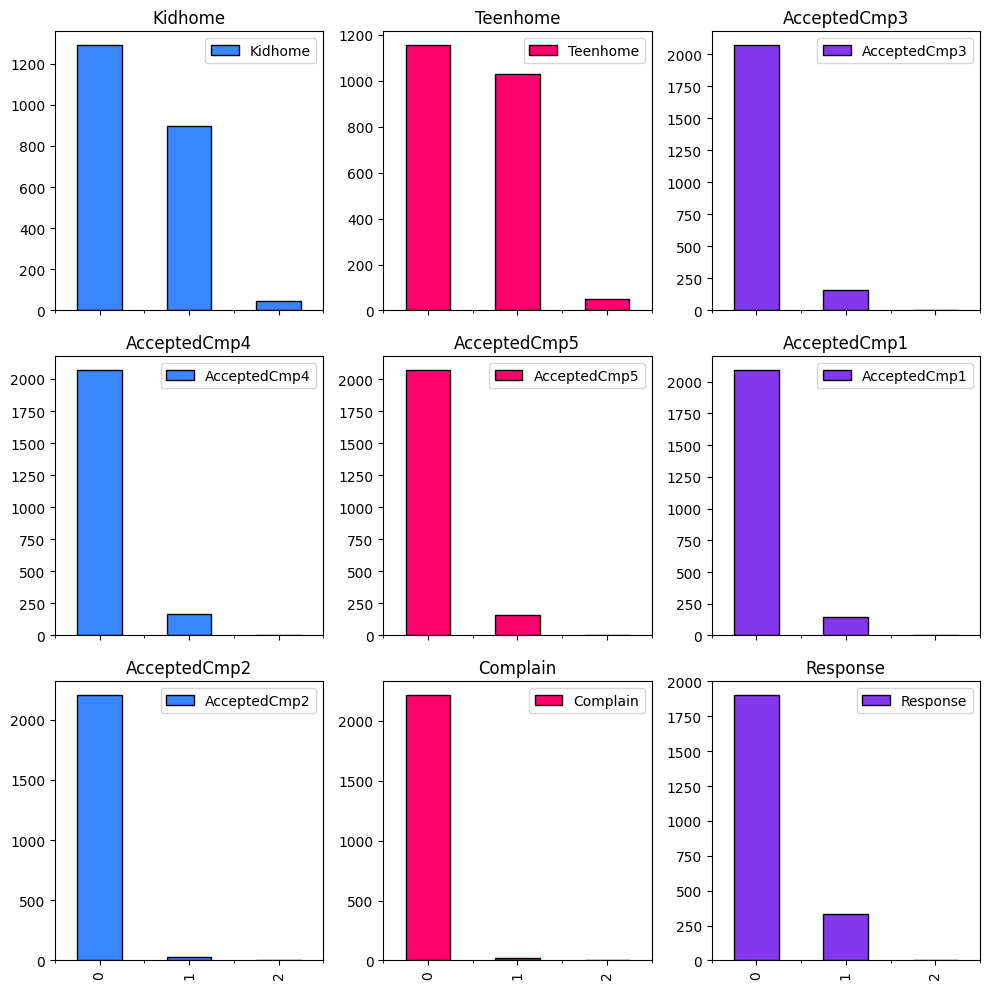

In [6]:
# Wyświetlamy wykresy kołowe dla danych binarnych i dotyczących liczby dzieci
ax = (
    df[bin_columns]
    .apply(lambda x: x.value_counts())
    .plot(
        kind="bar",
        subplots=True,
        figsize=(10, 10),
        layout=(3, 3),
        color=color_pallette,
        edgecolor='black',
    )
)

plt.tight_layout()
plt.show()